In [54]:
import os
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tensorflow as tf
import pandas as pd

In [55]:
# Define custom base directory
base_dir = r"C:\Users\natda\Desktop\NatDave\Academics\PhD_NU\CODING\DL\dl_getting_started"

# Create an NLTK data directory inside the base directory
nltk_data_dir = os.path.join(base_dir, 'nltk_data')
os.makedirs(nltk_data_dir, exist_ok=True)

# Add the custom directory to NLTK's search paths
nltk.data.path.append(nltk_data_dir)

# Download required NLTK resources to the custom directory
nltk.download('stopwords', download_dir=nltk_data_dir)
nltk.download('wordnet', download_dir=nltk_data_dir)

[nltk_data] Downloading package stopwords to C:\Users\natda\Desktop\Na
[nltk_data]     tDave\Academics\PhD_NU\CODING\DL\dl_getting_started\nl
[nltk_data]     tk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\natda\Desktop\NatD
[nltk_data]     ave\Academics\PhD_NU\CODING\DL\dl_getting_started\nltk
[nltk_data]     _data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [56]:
# Load dataset
spam_file = "Spam-Classification.csv"
spam_path = os.path.join(base_dir, spam_file)

# Read the dataset
spam_data = pd.read_csv(spam_path)

# Separate features and target
spam_classes_raw = spam_data["CLASS"]
spam_messages = spam_data["SMS"]

spam_data.head()

,CLASS,SMS
0,ham,"said kiss, kiss, i can't do the sound effects..."
1,ham,&lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.
2,spam,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3,spam,* FREE* POLYPHONIC RINGTONE Text SUPER to 8713...
4,spam,**FREE MESSAGE**Thanks for using the Auction S...


In [57]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Custom tokenizer using regex
def customtokenize(text):
    # Tokenize using regex to split on non-word characters
    tokens = re.findall(r'\b\w+\b', text.lower())
    # Remove stopwords
    english_stopwords = set(stopwords.words('english'))
    nostop = [token for token in tokens if token not in english_stopwords]
    # Perform lemmatization
    lemmatized = [lemmatizer.lemmatize(word) for word in nostop]
    return lemmatized

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(tokenizer=customtokenize, lowercase=False)

# Transform text to TF-IDF
tfidf = vectorizer.fit_transform(spam_messages)
tfidf_array = tfidf.toarray()

# Encode target labels
label_encoder = preprocessing.LabelEncoder()
spam_classes = label_encoder.fit_transform(spam_classes_raw)

# Convert target to one-hot encoding
spam_classes = tf.keras.utils.to_categorical(spam_classes, num_classes=2)

# Print shapes of transformed data
print("TF-IDF Matrix Shape:", tfidf.shape)
print("One-hot Encoding Shape:", spam_classes.shape)

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(tfidf_array, spam_classes, test_size=0.10, random_state=42)

# Print confirmation
print("Train/Test Split Done!")

TF-IDF Matrix Shape: (1500, 4255)
One-hot Encoding Shape: (1500, 2)
Train/Test Split Done!


In [58]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2

# Hyper Parameters for Model Building
NB_CLASSES=2
N_HIDDEN=32

model = keras.models.Sequential()

# Add Input layer
model.add(keras.layers.Input(shape=(X_train.shape[1:])))

model.add(keras.layers.Dense(N_HIDDEN,
                              name='Hidden-Layer-1',
                              activation='relu'))

model.add(keras.layers.Dense(N_HIDDEN,
                              name='Hidden-Layer-2',
                              activation='relu'))

model.add(keras.layers.Dense(NB_CLASSES,
                              name='Output-Layer',
                              activation='softmax'))

model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer-1 (Dense)          │ (None, 32)             │       136,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-2 (Dense)          │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137,314 (536.38 KB)

 Trainable params: 137,314 (536.38 KB)

 Non-trainable params: 0 (0.00 B)


Training Progress:
------------------------------------
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.5498 - loss: 0.6919 - val_accuracy: 0.7778 - val_loss: 0.6828
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8350 - loss: 0.6758 - val_accuracy: 0.9000 - val_loss: 0.6633
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9554 - loss: 0.6486 - val_accuracy: 0.9296 - val_loss: 0.6340
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9759 - loss: 0.6094 - val_accuracy: 0.9370 - val_loss: 0.5984
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9785 - loss: 0.5633 - val_accuracy: 0.9481 - val_loss: 0.5603
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9808 - loss: 0.5131 - val_accuracy: 0.9556 - val_loss: 0.5204
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9849 - loss: 0.4592 - val_accuracy: 0.9519 - val_loss: 0.4799
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9879 

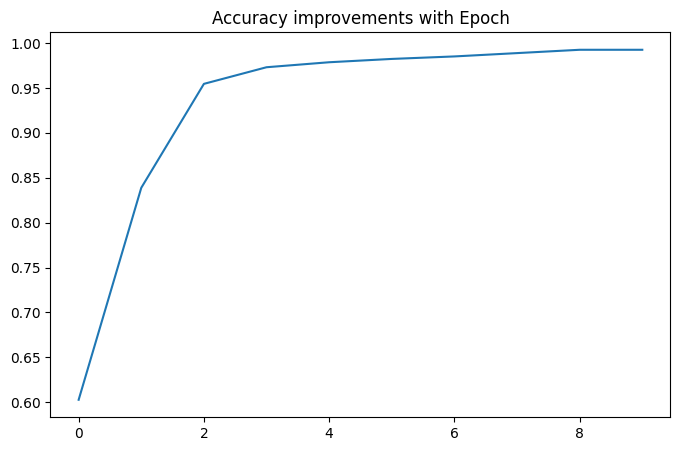


Evaluation against Test Dataset :
------------------------------------
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9474 - loss: 0.3337


[0.35148561000823975, 0.9333333373069763]

In [59]:
# Make it verbose so we can see the progress
VERBOSE=1

# Hyper Parameters for Training
BATCH_SIZE=256
EPOCHS=10
VALIDATION_SPLIT=0.2

print("\nTraining Progress:\n------------------------------------")

history=model.fit(X_train,
          Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)

print("\nAccuracy during Training :\n------------------------------------")
import matplotlib.pyplot as plt

pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test,Y_test)

In [60]:
# Predict for multiple samples using batch processing

# Convert input into IF-IDF vector using the same vectorizer model
predict_tfidf=vectorizer.transform(["FREE entry to a fun contest",
                                    "Yup I will come over"]).toarray()

print(predict_tfidf.shape)

# Predict using model
prediction=np.argmax( model.predict(predict_tfidf), axis=1 )
print("Prediction Output:" , prediction)

# Print prediction classes
print("Prediction Classes are ", label_encoder.inverse_transform(prediction))

(2, 4255)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Prediction Output: [1 0]
Prediction Classes are  ['spam' 'ham']
